In [1]:
from edgedroid.models.timings import *

runs_per_model = 30
task_steps = 100

models = {
    "empirical": {
        "low": EmpiricalExecutionTimeModel.from_default_data(neuroticism=0.0),
        "high": EmpiricalExecutionTimeModel.from_default_data(neuroticism=1.0),
    },
    "theoretical": {
        "low": TheoreticalExecutionTimeModel.from_default_data(neuroticism=0.0),
        "high": TheoreticalExecutionTimeModel.from_default_data(neuroticism=1.0),
    },
    "constant": {"n/a": ConstantExecutionTimeModel.from_default_data()},
    "naive": {"n/a": NaiveExecutionTimeModel.from_default_data()},
    "fitted-naive": {"n/a": FittedNaiveExecutionTimeModel.from_default_data()},
}

In [2]:
import numpy as np

ttfs = np.linspace(0, 7, 50)
ttfs

array([0.        , 0.14285714, 0.28571429, 0.42857143, 0.57142857,
       0.71428571, 0.85714286, 1.        , 1.14285714, 1.28571429,
       1.42857143, 1.57142857, 1.71428571, 1.85714286, 2.        ,
       2.14285714, 2.28571429, 2.42857143, 2.57142857, 2.71428571,
       2.85714286, 3.        , 3.14285714, 3.28571429, 3.42857143,
       3.57142857, 3.71428571, 3.85714286, 4.        , 4.14285714,
       4.28571429, 4.42857143, 4.57142857, 4.71428571, 4.85714286,
       5.        , 5.14285714, 5.28571429, 5.42857143, 5.57142857,
       5.71428571, 5.85714286, 6.        , 6.14285714, 6.28571429,
       6.42857143, 6.57142857, 6.71428571, 6.85714286, 7.        ])

In [3]:
import pandas as pd
import itertools as it

combs = deque()
for model_name, variants in models.items():
    for neuro, model in variants.items():
        for ttf, run in it.product(ttfs, range(1, runs_per_model + 1)):
            combs.append((model, model_name, neuro, ttf, run))

# results = pd.DataFrame(
#     columns=["model", "neuroticism", "repetition", "step", "exec_time", "ttf", "duration", "cumulative_duration"],
#     index=np.arange(0, len(combs))
# )
# results["model"] = "fitted-naive"
# results["neuroticism"] = "n/a"
# results["repetition"]  = -1
# results["step"] = -1
# results["exec_time"] = 0.0
# results["ttf"] = 0.0
# results["duration"] = 0.0
# results["cumulative_duration"] = 0.0
#
# results["model"] = results["model"].astype(pd.CategoricalDtype(models.keys(), ordered=False))
# results["neuroticism"] = results["neuroticism"].astype(pd.CategoricalDtype(["n/a", "low", "high"], ordered=True))
# results["repetition"] = results["repetition"].astype(int)
# results["step"] = results["step"].astype(int)
# results["exec_time"] = results["exec_time"].astype(float)
# results["ttf"] = results["ttf"].astype(float)
# results["duration"] = results["duration"].astype(float)
# results["cumulative_duration"] = results["cumulative_duration"].astype(float)
#
# results.shape

In [10]:
from tqdm.notebook import tqdm_notebook as tqdm

curr_idx = 0
tqdm_iter = tqdm(combs)

rows = deque()

for model, model_name, neuro, ttf, repetition in tqdm_iter:
    tqdm_iter.set_description(
        desc=f"Model {model_name}, neuro {neuro}, TTF {ttf:0.02f}s, repetition {repetition}"
    )
    model.reset()
    cum_duration = 0.0

    for step in range(1, task_steps + 1):
        exec_time = model.advance(ttf).get_execution_time()
        duration = exec_time + ttf
        cum_duration += duration

        rows.append(
            {
                "model": model_name,
                "neuroticism": neuro,
                "repetition": repetition,
                "step": step,
                "exec_time": exec_time,
                "ttf": ttf,
                "duration": duration,
                "cumulative_duration": cum_duration,
            }
        )

        # results.loc[curr_idx, ["model", "neuroticism", "repetition", "step", "exec_time", "ttf", "duration", "cumulative_duration"]] = \
        #     [model_name, neuro, repetition, step, exec_time, ttf, duration, cum_duration]


        # model_name
        # results.at[curr_idx, "neuroticism"] = neuro
        # results.at[curr_idx, "repetition"] = repetition
        # results.at[curr_idx, "step"] = step
        # results.at[curr_idx, "exec_time"] = exec_time
        # results.at[curr_idx, "ttf"] = ttf
        # results.at[curr_idx, "duration"] = duration
        # results.at[curr_idx, "cumulative_duration"] = cum_duration

        curr_idx += 1

results = pd.DataFrame(rows)
results["model"] = results["model"].astype(pd.CategoricalDtype(models.keys(), ordered=False))
results["neuroticism"] = results["neuroticism"].astype(pd.CategoricalDtype(["n/a", "low", "high"], ordered=True))
results["repetition"] = results["repetition"].astype(int)
results["step"] = results["step"].astype(int)
results["exec_time"] = results["exec_time"].astype(float)
results["ttf"] = results["ttf"].astype(float)
results["duration"] = results["duration"].astype(float)
results["cumulative_duration"] = results["cumulative_duration"].astype(float)
results

  0%|          | 0/10500 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



,model,neuroticism,repetition,step,exec_time,ttf,duration,cumulative_duration
0,empirical,low,1,1,4.993619,0.0,4.993619,4.993619
1,empirical,low,1,2,6.375531,0.0,6.375531,11.369150
2,empirical,low,1,3,3.498575,0.0,3.498575,14.867725
3,empirical,low,1,4,5.628662,0.0,5.628662,20.496388
4,empirical,low,1,5,8.144268,0.0,8.144268,28.640655
...,...,...,...,...,...,...,...,...
1049995,fitted-naive,n/a,30,96,4.499884,7.0,11.499884,1221.313676
1049996,fitted-naive,n/a,30,97,5.280418,7.0,12.280418,1233.594094
1049997,fitted-naive,n/a,30,98,4.007838,7.0,11.007838,1244.601932
1049998,fitted-naive,n/a,30,99,7.272315,7.0,14.272315,1258.874247


In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("paper")
sns.set_style("whitegrid")

end_steps = results[results.step == results.step.max()]
end_steps

,model,neuroticism,repetition,step,exec_time,ttf,duration,cumulative_duration
99,empirical,low,1,100,3.527233,0.0,3.527233,584.534979
199,empirical,low,2,100,5.225975,0.0,5.225975,488.872083
299,empirical,low,3,100,6.344671,0.0,6.344671,506.301967
399,empirical,low,4,100,2.366081,0.0,2.366081,494.310586
499,empirical,low,5,100,7.644703,0.0,7.644703,534.188532
...,...,...,...,...,...,...,...,...
1049599,fitted-naive,n/a,26,100,4.980883,7.0,11.980883,1267.500241
1049699,fitted-naive,n/a,27,100,8.432241,7.0,15.432241,1308.620739
1049799,fitted-naive,n/a,28,100,4.114088,7.0,11.114088,1273.907074
1049899,fitted-naive,n/a,29,100,4.350557,7.0,11.350557,1277.715343


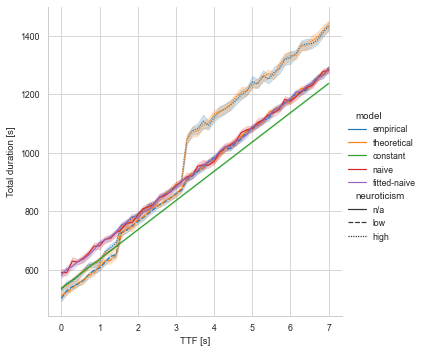

In [13]:
fg = sns.relplot(
    kind="line",
    data=end_steps,
    x="ttf",
    y="cumulative_duration",
    hue="model",
    # style="neuroticism",
    hue_order=["empirical", "theoretical", "constant", "naive", "fitted-naive"],
    style="neuroticism",
)
fg.set_axis_labels("TTF [s]", "Total duration [s]")
plt.show()

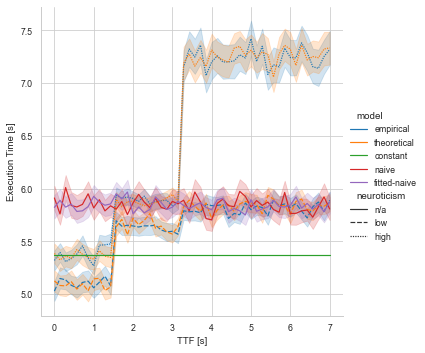

In [14]:
fg = sns.relplot(
    kind="line",
    data=results,
    x="ttf",
    y="exec_time",
    hue="model",
    hue_order=["empirical", "theoretical", "constant", "naive", "fitted-naive"],
    style="neuroticism",
)
fg.set_axis_labels("TTF [s]", "Execution Time [s]")
plt.show()